In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from numpy import det
import math as mt

## Part I: Data Analysis - Diamond Dataset

In [2]:
data = pd.read_csv('diamonds.csv', index_col=0)
print("Dataset 1: Diamond Dataset")
data=data.sort_values(by='price',ascending='true')
data

Dataset 1: Diamond Dataset


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [3]:
#calcluating the sum of null entries
print(data.isna().sum().sum())

0


In [4]:
stat_data = data.describe(include='all')
print("Main Statistics of Dataset 1:")
stat_data

Main Statistics of Dataset 1:


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [5]:
print("Titles of the given Dataset:")
column_data = list(data.columns)
column_data

Titles of the given Dataset:


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [6]:
shape_data = list(data.shape)
print("Shape of the Dataste:", shape_data)



Shape of the Dataste: [53940, 10]


In [7]:
print("Basic Info of the Dataset:")
info_data = data.info()

Basic Info of the Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 27750
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
#printing forst 10 rows of the Dataset
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [9]:
print("Number of NA values in each column:")
data.isnull().sum(axis=0)

Number of NA values in each column:


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
#Droping rows with NA values
data_main = data.dropna()
data_main

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [11]:
data_main['clarity'] = data_main['clarity'].astype('category')
data_main['cut'] = data_main['cut'].astype('category')
data_main['color'] = data_main['color'].astype('category')
data_main.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 27750
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


Different types of Diamonds and thier numbers


<AxesSubplot:>

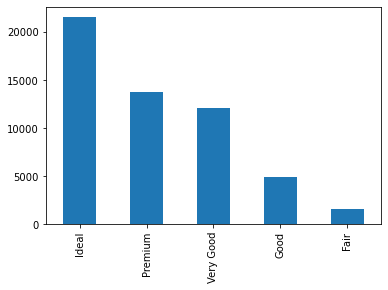

In [12]:
print("Different types of Diamonds and thier numbers")
item = data_main['cut'].tolist()
data_fig1 = pd.DataFrame({'keys':item})
pd.value_counts(data_fig1['keys']).plot.bar()

Different types of Diamonds and thier color


<AxesSubplot:>

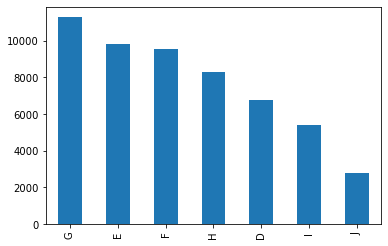

In [13]:
print("Different types of Diamonds and thier color")
item = data_main['color'].tolist()
data_fig1 = pd.DataFrame({'keys':item})
pd.value_counts(data_fig1['keys']).plot.bar()

Different types of Diamonds and thier clarity


<AxesSubplot:>

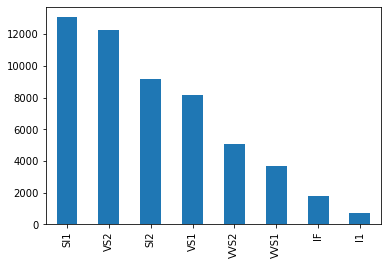

In [14]:
print("Different types of Diamonds and thier clarity")
item = data_main['clarity'].tolist()
data_fig1 = pd.DataFrame({'keys':item})
pd.value_counts(data_fig1['keys']).plot.bar()

Plotting number of ideal cut diamonds with VS1 clarity


<AxesSubplot:>

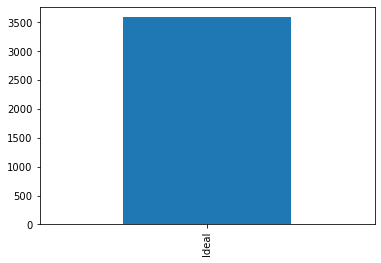

In [15]:
#Graph2: Plotting number of ideal cut diamonds with Sl1 clarity
data_f=data_main.loc[(data_main['cut']=='Ideal') & (data_main['clarity'] == 'VS1')]
item = data_f["cut"].tolist()
data_fig2 = pd.DataFrame({'keys': item})
print("Plotting number of ideal cut diamonds with VS1 clarity")
pd.value_counts(data_fig2['keys']).plot.bar()

In [16]:
data_main['clarity'] = data_main['clarity'].astype('category')
data_main['cut'] = data_main['cut'].astype('category')
data_main['color'] = data_main['color'].astype('category')
data_main.info()
data_main

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 27750
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


<BarContainer object of 53940 artists>

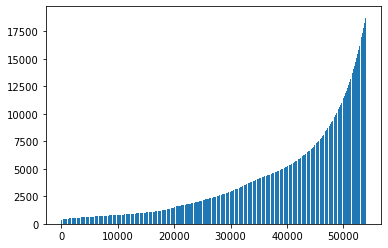

In [17]:
plt.bar(range(53940),data['price'])

In [18]:
# the price of a diamond is affected by the 4Cs i.e., Color, clarity, cut, and carat
#we need to assign a factor to the classified values such as color, and cut
#first we get the count of classified elements: cut

print(data)
data_cut = data['cut']
print(data_cut)
data_cut_n = data_cut.to_numpy()
#print(data_cut_n)
data_cut_n_l = data_cut_n.tolist()
res = {}

for i in data_cut_n_l:
    res[i] = data_cut_n_l.count(i)
print(res)
#plt.plot(data_n[:0],data_n[:6])

       carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
27746   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
27747   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27748   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27749   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27750   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16

[53940 rows x 10 columns]
1            Ideal
2          Premium
3          

In [19]:
#number of classifications obtained:5, assigning factor accordingly {ideal:5, premium:4, very good:3, good:2, fair:1}
print(len(data_cut))
#print(data_cut_n_l)
for i in range(53940):
    if data_cut_n_l[i] == 'Ideal':
        data_cut_n_l[i] = 5
    elif data_cut_n_l[i] == 'Premium':
        data_cut_n_l[i] = 4
    elif data_cut_n_l[i] == 'Very Good':
        data_cut_n_l[i] = 3
    elif data_cut_n_l[i] == 'Good':
        data_cut_n_l[i] = 2
    elif data_cut_n_l[i] == 'Fair':
        data_cut_n_l[i] = 1
#print(data_cut_n_l)
data_cut_n_l_r = np.reshape(data_cut_n_l, (53940,1))
print(data_cut_n_l_r)
        

53940
[[5]
 [4]
 [2]
 ...
 [5]
 [3]
 [4]]


In [20]:
# the price of a diamond is affected by the 4Cs i.e., Color, clarity, cut, and carat
#we need to assign a factor to the classified values such as color, and cut
#first we get the count of classified elements: color
data_n = data.to_numpy()
#print(data_n)
data_color = data['color']
print(data_color)
data_color_n = data_color.to_numpy()
#print(data_cut_n)
data_color_n_l = data_color_n.tolist()
res = {}

for i in data_color_n_l:
    res[i] = data_color_n_l.count(i)
print(res)

1        E
2        E
3        E
4        I
5        J
        ..
27746    H
27747    G
27748    G
27749    G
27750    I
Name: color, Length: 53940, dtype: object
{'E': 9797, 'I': 5422, 'J': 2808, 'H': 8304, 'F': 9542, 'G': 11292, 'D': 6775}


In [21]:
#number of classifications obtained:7, assigning factor accordingly {E:6, I:5, J:4, H:2, F:3, G:2, D:1}
print(len(data_color))
#print(data_cut_n_l)
for i in range(53940):
    if data_color_n_l[i] == 'E':
        data_color_n_l[i] = 7
    elif data_color_n_l[i] == 'I':
        data_color_n_l[i] = 6
    elif data_color_n_l[i] == 'J':
        data_color_n_l[i] = 5
    elif data_color_n_l[i] == 'H':
        data_color_n_l[i] = 4
    elif data_color_n_l[i] == 'F':
        data_color_n_l[i] = 3
    elif data_color_n_l[i] == 'G':
        data_color_n_l[i] = 2
    elif data_color_n_l[i] == 'D':
        data_color_n_l[i] = 1
#print(data_cut_n_l)
data_color_n_l_r = np.reshape(data_color_n_l, (53940,1))
print(data_color_n_l_r)
        

53940
[[7]
 [7]
 [7]
 ...
 [2]
 [2]
 [6]]


In [22]:
# the price of a diamond is affected by the 4Cs i.e., Color, clarity, cut, and carat
#we need to assign a factor to the classified values such as color, and cut
#first we get the count of classified elements: clarity
data_n = data.to_numpy()
#print(data_n)
data_clarity = data['clarity']
print(data_clarity)
data_clarity_n = data_clarity.to_numpy()
#print(data_cut_n)
data_clarity_n_l = data_clarity_n.tolist()
res = {}

for i in data_clarity_n_l:
    res[i] = data_clarity_n_l.count(i)
print(res)

1        SI2
2        SI1
3        VS1
4        VS2
5        SI2
        ... 
27746    SI1
27747    SI2
27748     IF
27749    SI1
27750    VS2
Name: clarity, Length: 53940, dtype: object
{'SI2': 9194, 'SI1': 13065, 'VS1': 8171, 'VS2': 12258, 'VVS2': 5066, 'VVS1': 3655, 'I1': 741, 'IF': 1790}


In [23]:
#number of classifications obtained:8, assigning factor accordingly {SI2:2, SI1:3, VS1:5, VS2:4, VVS2:6, VVS1:7, I1:1, IF:8}
print(len(data_clarity))
#print(data_cut_n_l)
for i in range(53940):
    if data_clarity_n_l[i] == 'IF':
        data_clarity_n_l[i] = 8
    elif data_clarity_n_l[i] == 'VVS1':
        data_clarity_n_l[i] = 7
    elif data_clarity_n_l[i] == 'VVS2':
        data_clarity_n_l[i] = 6
    elif data_clarity_n_l[i] == 'VS1':
        data_clarity_n_l[i] = 5
    elif data_clarity_n_l[i] == 'VS2':
        data_clarity_n_l[i] = 4
    elif data_clarity_n_l[i] == 'SI1':
        data_clarity_n_l[i] = 3
    elif data_clarity_n_l[i] == 'SI2':
        data_clarity_n_l[i] = 2
    elif data_clarity_n_l[i] == 'I1':
        data_clarity_n_l[i] = 1
#print(data_cut_n_l)
data_clarity_n_l_r = np.reshape(data_clarity_n_l, (53940,1))
print(data_clarity_n_l_r)

53940
[[2]
 [3]
 [5]
 ...
 [8]
 [3]
 [4]]


In [24]:

bias = np.ones(53940)
data_carat = data['carat']
data_carat_n = data_carat.to_numpy()
data_carat_n_l = data_carat_n.tolist()
data_carat_n_l_r = np.reshape(data_carat_n_l, (53940,1))
print(data_carat_n_l_r)
#print(data_carat)
print(bias)
print(len(bias))
#our 'y', as in our output shall be the price of the diamond
data_price = data['price']
data_price_n = data_price.to_numpy()
data_price_n_l = data_price_n.tolist()
data_price_train_n_l = data_price_n_l[10788:]
print(len(data_price_train_n_l))
data_price_test_n_l = data_price_n_l[:10788]
#print(data_price_n_l)
#we shall also take the depth of the diamond for visualization purposes
data_depth = data['depth']
data_depth_n = data_depth.to_numpy()
data_depth_n_l = data_depth_n.tolist()
#print(data_depth_n_l)
data_eval = pd.DataFrame({'bias':bias,'carat':data_carat_n_l,'clarity':data_clarity_n_l,'color':data_color_n_l,'cut':data_cut_n_l, 'depth':data_depth_n_l})

print(data_eval)


[[0.23]
 [0.21]
 [0.23]
 ...
 [1.51]
 [2.  ]
 [2.29]]
[1. 1. 1. ... 1. 1. 1.]
53940
43152
       bias  carat  clarity  color  cut  depth
0       1.0   0.23        2      7    5   61.5
1       1.0   0.21        3      7    4   59.8
2       1.0   0.23        5      7    2   56.9
3       1.0   0.29        4      6    4   62.4
4       1.0   0.31        2      5    2   63.3
...     ...    ...      ...    ...  ...    ...
53935   1.0   2.00        3      4    3   62.8
53936   1.0   2.07        2      2    5   62.5
53937   1.0   1.51        8      2    5   61.7
53938   1.0   2.00        3      2    3   63.5
53939   1.0   2.29        4      6    4   60.8

[53940 rows x 6 columns]


In [25]:
#5 main statistics of our data
print('sum', data_eval.sum())
print('count', data_eval.count())
print('mean', data_eval.mean())
print('Standard Deviation', data_eval.std())
print('Mode', data_eval.mode())
print('Median', data_eval.median())

sum bias         53940.00
carat        43040.87
clarity     218512.00
color       206352.00
cut         210587.00
depth      3330762.90
dtype: float64
count bias       53940
carat      53940
clarity    53940
color      53940
cut        53940
depth      53940
dtype: int64
mean bias        1.000000
carat       0.797940
clarity     4.051020
color       3.825584
cut         3.904097
depth      61.749405
dtype: float64
Standard Deviation bias       0.000000
carat      0.474011
clarity    1.647136
color      2.050156
cut        1.116600
depth      1.432621
dtype: float64
Mode    bias  carat  clarity  color  cut  depth
0   1.0    0.3        3      2    5   62.0
Median bias        1.0
carat       0.7
clarity     4.0
color       3.0
cut         4.0
depth      61.8
dtype: float64


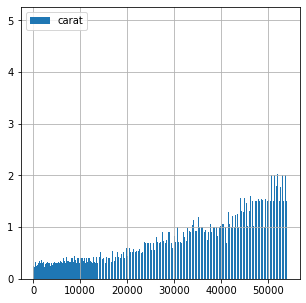

In [26]:

#fig.suptitle('Vertically stacked subplots')
plt.rcParams["figure.figsize"] = (5,5)
#plt.rcParams["figure.rotate"] = (15,15)
plt.bar(range(53940),data_carat_n_l , label='carat')
plt.legend()
plt.grid()




       carat    cut color clarity  depth  table  price     x     y     z
1       0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
12      0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
14      0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
17      0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
28263   0.25  Ideal     H     SI1   62.8   54.0    357  4.05  4.07  2.55
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
27736   1.60  Ideal     F     VS1   62.0   56.0  18780  7.47  7.52  4.65
27739   2.05  Ideal     G     SI1   61.9   57.0  18787  8.10  8.16  5.03
27742   2.15  Ideal     G     SI2   62.6   54.0  18791  8.29  8.35  5.21
27747   2.07  Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27748   1.51  Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56

[21551 rows x 10 columns]


C:\Users\surya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


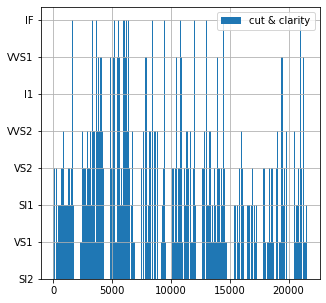

In [27]:

#Graph2: Plotting number of ideal cut diamonds with Sl1 clarity
data_f_cut_clarity=data_main.loc[(data_main['cut']=='Ideal')]
print(data_f_cut_clarity)
data_f_cut_clarity_n = data_f_cut_clarity.to_numpy()
data_f_cut_clarity_n_l = data_f_cut_clarity_n.tolist()
item = data_f_cut_clarity["clarity"].tolist()
#print(item)
plt.bar(range(21551), item, label='cut & clarity')
plt.legend()
plt.grid()

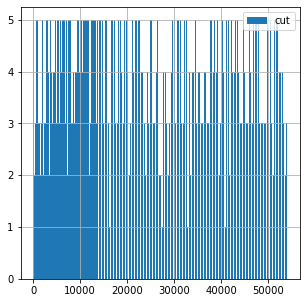

In [28]:
plt.bar(range(53940),data_cut_n_l ,label='cut')
plt.legend()
plt.grid()

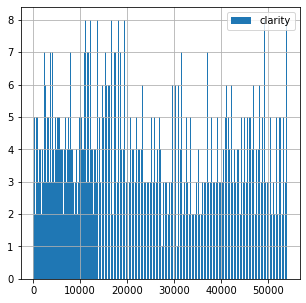

In [29]:
plt.bar(range(53940),data_clarity_n_l,label='clarity')
plt.legend()
plt.grid()

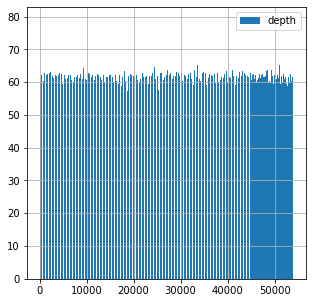

In [30]:

plt.bar(range(53940),data_depth_n_l,label='depth')
plt.legend()
plt.grid()

## Part II: Linear Regression

In [31]:
#we split the data set to train and test here.
data_eval_train = data_eval.iloc[10788:]
print(data_eval_train)
data_eval_test = data_eval.iloc[:10788]
print(data_eval_test)
data_eval_test_n = data_eval_test.to_numpy()
data_eval_test_n_l = data_eval_test_n.tolist()

data_eval_train_n = data_eval_train.to_numpy()
print(len(data_eval_train_n))
data_eval_train_n_tra = np.matrix.transpose(data_eval_train_n)
print(data_eval_train_n_tra)


       bias  carat  clarity  color  cut  depth
10788   1.0   0.30        6      7    5   61.1
10789   1.0   0.31        6      7    4   60.5
10790   1.0   0.30        6      7    5   61.1
10791   1.0   0.32        6      7    5   60.8
10792   1.0   0.32        6      7    5   60.9
...     ...    ...      ...    ...  ...    ...
53935   1.0   2.00        3      4    3   62.8
53936   1.0   2.07        2      2    5   62.5
53937   1.0   1.51        8      2    5   61.7
53938   1.0   2.00        3      2    3   63.5
53939   1.0   2.29        4      6    4   60.8

[43152 rows x 6 columns]
       bias  carat  clarity  color  cut  depth
0       1.0   0.23        2      7    5   61.5
1       1.0   0.21        3      7    4   59.8
2       1.0   0.23        5      7    2   56.9
3       1.0   0.29        4      6    4   62.4
4       1.0   0.31        2      5    2   63.3
...     ...    ...      ...    ...  ...    ...
10783   1.0   0.31        6      7    5   61.6
10784   1.0   0.40        3      7

In [32]:
print('Shape of X_Train', np.shape(data_eval_train))
print('Shape of Y_Train', np.shape(data_price_train_n_l))
print('Shape of X_Test', np.shape(data_eval_test))
print('Shape of Y_Test', np.shape(data_price_test_n_l))

Shape of X_Train (43152, 6)
Shape of Y_Train (43152,)
Shape of X_Test (10788, 6)
Shape of Y_Test (10788,)


In [33]:
weights_inv = np.dot(data_eval_train_n_tra, data_eval_train_n)
#print(weights_inv)
weights_inv_t = np.linalg.pinv(weights_inv)
#weights_inv_new = NMatix.new(weights_inv)
#print(np.linalg.det(weights_inv))
#print(np.shape(weights_inv))
#print(np.shape(data_eval_train_n_tra))
weights_r = np.dot(data_eval_train_n_tra, data_price_train_n_l)
#print(np.shape(weights_r))
weights = np.dot(weights_inv_t,weights_r)
print("weights",weights)



weights [-2411.55640009  8929.72721905   575.61829967   -95.18820853
   164.28182711   -57.85212848]


In [34]:
weights_tra = np.matrix.transpose(weights)
print(weights_tra)

[-2411.55640009  8929.72721905   575.61829967   -95.18820853
   164.28182711   -57.85212848]


[  341.39818918   301.12491135   341.39818918 ... 12738.83448913
 13803.61184264 16908.58077572]
RSME 1398.578356289378


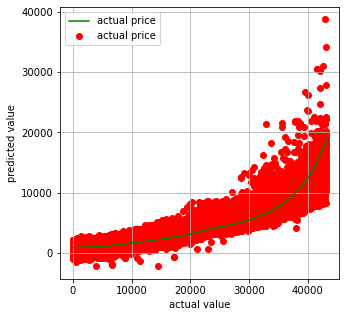

In [35]:
price_predict = np.dot(data_eval_train_n,weights_tra)
price_predict_tra = np.matrix.transpose(price_predict)
print(price_predict_tra)
error = data_price_train_n_l - price_predict
error_sqr_train = np.square(error)
error_sqr_train_sum = np.sum(error_sqr_train)
RSME = (error_sqr_train_sum/len(error_sqr_train))**0.5
print('RSME',RSME)
#print(data_price_train_n_l)
plt.rcParams["figure.figsize"] = (5,5)
plt.grid()
#plt.scatter(data_price_train_n_l, price_predict, color='g', label='expected')
#plt.scatter(range(10788), data_price_train_n_l, color='r', label='actual price')
plt.plot(range(43152), data_price_train_n_l, color='g', label='actual price')
plt.scatter(range(43152), price_predict, color='r', label='actual price')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.legend()


RSME 1204.9024303693927


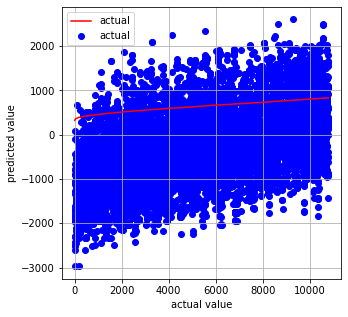

In [36]:
price_predict_test = np.dot(data_eval_test_n_l,weights_tra)
error = data_price_test_n_l - price_predict_test
error_sqr_test = np.square(error)
error_sqr_test_sum = np.sum(error_sqr_test)
RSME = (error_sqr_test_sum/len(error_sqr_test))**0.5
print('RSME',RSME)
#plt.scatter(data_price_test_n_l,price_predict_test, color='g', label='expected')
plt.plot(range(10788),data_price_test_n_l, color='r', label='actual')
plt.scatter(range(10788),price_predict_test, color='b', label='actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.legend()
plt.grid()


## Part III - Ridge Regression

Ridge Regression RSME: 1398.5789028952088
Ridge Regression Weights: [-2358.65439881  8928.93222186   575.49104487   -95.20808833
   163.95081504   -58.66646723]


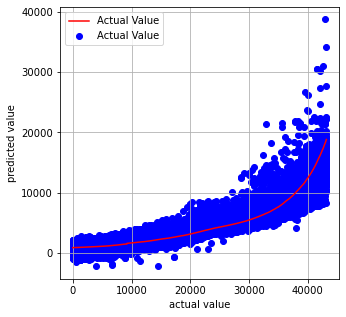

In [37]:
l = 0.5 #assuming value 0.5 for lambda
weights_rid = np.dot(np.linalg.inv(weights_inv + l*np.eye(len(weights_inv))),weights_r)
weights_rid_tra = np.matrix.transpose(weights_rid)
predict_rid_train = np.dot(data_eval_train_n,weights_rid_tra)

error_rid = data_price_train_n_l - predict_rid_train
error_rid_tra = np.matrix.transpose(error_rid)
error_rid_sqr_train = np.square(error_rid)
error_rid_sqr_train_sum = np.sum(error_rid_sqr_train)
RSME_rid = mt.sqrt(error_rid_sqr_train_sum/len(error_rid_sqr_train))
print('Ridge Regression RSME:',RSME_rid)
print('Ridge Regression Weights:', weights_rid)

#plt.scatter(data_price_train_n_l,predict_rid_train, color = 'b', label = 'Predicted Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.plot(range(43152),data_price_train_n_l, color='r', label = 'Actual Value')
plt.scatter(range(43152),predict_rid_train, color='b', label = 'Actual Value')
plt.grid()
plt.legend()


Ridge Regression RSME: 1204.550017639401
Ridge Regression Weights: [-2358.65439881  8928.93222186   575.49104487   -95.20808833
   163.95081504   -58.66646723]


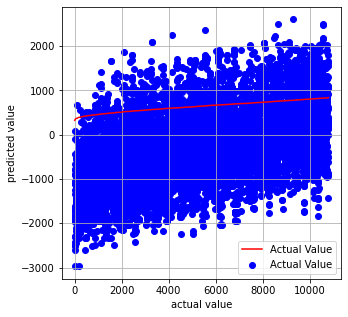

In [38]:
predict_rid_test = np.dot(data_eval_test_n,weights_rid_tra)
#print(np.shape(predict_rid_test))
error_rid = data_price_test_n_l - predict_rid_test
error_rid_tra = np.matrix.transpose(error_rid)
error_rid_sqr_test = np.square(error_rid)
error_rid_sqr_test_sum = np.sum(error_rid_sqr_test)
RSME_rid = mt.sqrt(error_rid_sqr_test_sum/len(error_rid_sqr_test))
print('Ridge Regression RSME:',RSME_rid)
print('Ridge Regression Weights:', weights_rid)
#plt.scatter(data_price_test_n_l,predict_rid_test, color = 'b', label = 'Predicted Value')
#plt.scatter(range(43152),data_price_test_n_l, label = 'Actual Value')
plt.plot(range(10788),data_price_test_n_l,color='r', label = 'Actual Value')
plt.scatter(range(10788),predict_rid_test,color='b', label = 'Actual Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.grid()
plt.legend()

## Part IV - Gradient Descent

[-2358.65439881  8928.93222186   575.49104487   -95.20808833
   163.95081504   -58.66646723]
[ 2358.65447253 -8928.93215406  -575.49075174    95.20837045
  -163.95052814    58.67100906]
[3.53704028e+50 3.24221035e+50 1.40279203e+51 1.35372051e+51
 1.37154216e+51 2.18514475e+52]
[1.36032492e+54 1.34584575e+54 1.36032492e+54 ... 1.36986508e+54
 1.39959951e+54 1.34888384e+54]
Gradient Descent RSME 1.3662895214324225e+54
Gradient Descent Weights [3.53704028e+50 3.24221035e+50 1.40279203e+51 1.35372051e+51
 1.37154216e+51 2.18514475e+52]


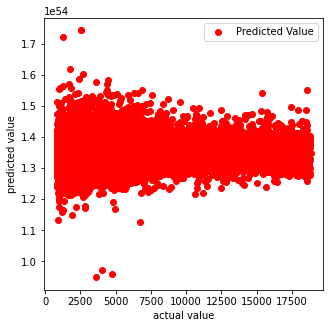

In [39]:
alpha = 0.8 #Assuming alpha as 0.2
weights_grad = weights_rid
print(weights_grad)
del_j = -2*weights_r + 2*np.dot(weights_inv,weights_grad)
print(del_j)
for i in range(7):
    del_j = -2*weights_r + 2*np.dot(weights_inv,weights_grad)
    weights_grad = weights_grad - alpha*del_j
    
weights_grad_tra = np.matrix.transpose(weights_grad)
print(weights_grad)
predict_grad_train = np.dot(data_eval_train_n,weights_grad_tra)
print(predict_grad_train)
error_grad_train = data_price_train_n_l - predict_grad_train
error_grad_train_sqr = np.square(error_grad_train)
error_grad_train_sqr_sum = np.sum(error_grad_train_sqr)
RSME_grad_train = mt.sqrt(error_grad_train_sqr_sum/len(error_grad_train_sqr))
print('Gradient Descent RSME', RSME_grad_train)
print('Gradient Descent Weights', weights_grad)
plt.scatter(data_price_train_n_l,predict_grad_train, color = 'r', label = 'Predicted Value')
#plt.scatter(range(10788),data_price_train_n_l, label = 'Actual Value')
#plt.plot(range(43152),data_price_train_n_l, label = 'Actual Value')
#plt.scatter(range(43152),predict_grad_train, label = 'Actual Value')

plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.legend()

Gradient Descent RSME 1.3673206693659306e+54


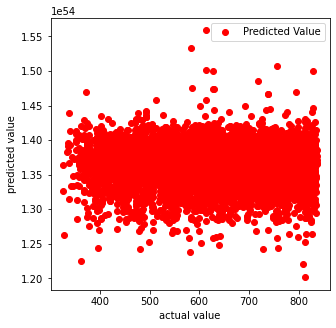

In [40]:
predict_grad_test = np.dot(data_eval_test_n,weights_grad_tra)
error_grad_test = data_price_test_n_l - predict_grad_test
error_grad_test_sqr = np.square(error_grad_test)
error_grad_test_sqr_sum = np.sum(error_grad_test_sqr)
RSME_grad_test = (error_grad_test_sqr_sum/len(error_grad_test_sqr))**0.5
print('Gradient Descent RSME', RSME_grad_test)
plt.scatter(data_price_test_n_l,predict_grad_test, color = 'r', label = 'Predicted Value')
#plt.scatter(range(43152),data_price_test_n_l, label = 'Actual Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.legend()

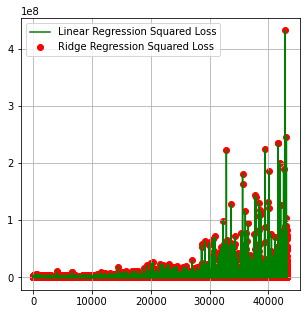

In [41]:
plt.plot(range(43152), error_sqr_train, color = 'g', label = 'Linear Regression Squared Loss')
plt.scatter(range(43152), error_rid_sqr_train, color = 'r', label = 'Ridge Regression Squared Loss')
#plt.plot(range(43152), error_grad_train_sqr, color = 'b', label = 'Gradient Descent Squared Loss')
plt.grid()
plt.legend()

## References

In [ ]:
#https://numpy.org/doc/stable/index.html
#https://pandas.pydata.org/
#google searches on how to matrix multiplications, mattrix transpose, matrix reshapes
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html